<a href="https://colab.research.google.com/github/kghhhhui/baby_spsu/blob/main/04_Spectral_Subtraction_baby_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#pip install AudioSegment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp310-cp310-linux_x86_64.whl size=73462 sha256=4eaa81c317e28a747f7dbc3b0c41bba47bf591ea74f74a5b3ac4ddaa07d6f261
  Stored in directory: /root/.cache/pip/wheels/2a/2b/84/ac7bacfe8c68a87c1ee3dd3c66818a54c71599abf308e8eb35
Successfully built webrtcvad


In [3]:
import numpy as np
import scipy
import librosa
import librosa.display
import matplotlib.pyplot as plt
import signal
from pydub import AudioSegment
from pydub.playback import play
from IPython.display import Audio, display

In [4]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Clean audio


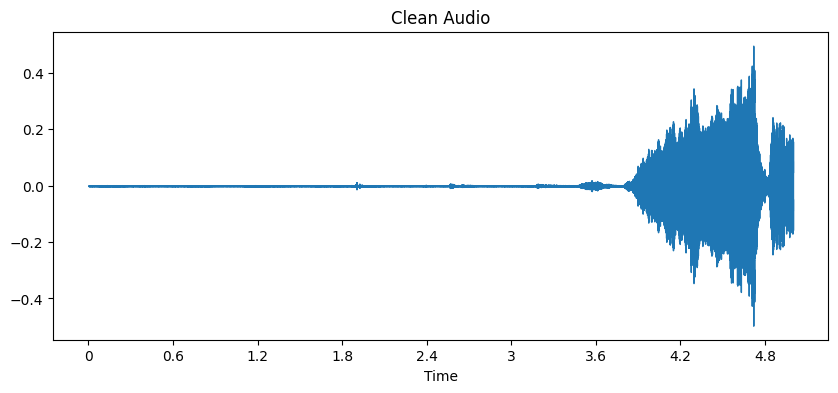

Clean audio


In [5]:
# 01) 원본 음성 신호 로드
speech_file = "/content/drive/MyDrive/baby/baby-data-main/sample/sad/03-02-04-01-87-150-03-01-00-14-04.wav"
x, fs = librosa.load(speech_file, sr=16000)

print("Clean audio")
plt.figure(figsize=(10, 4))
librosa.display.waveshow(x, sr=fs)
plt.title("Clean Audio")
plt.show()
# IPython.display.display(Audio(x, rate=fs))

# 원본 음성 신호 오디오 형식으로 재생
print("Clean audio")
display(Audio(x, rate=fs))

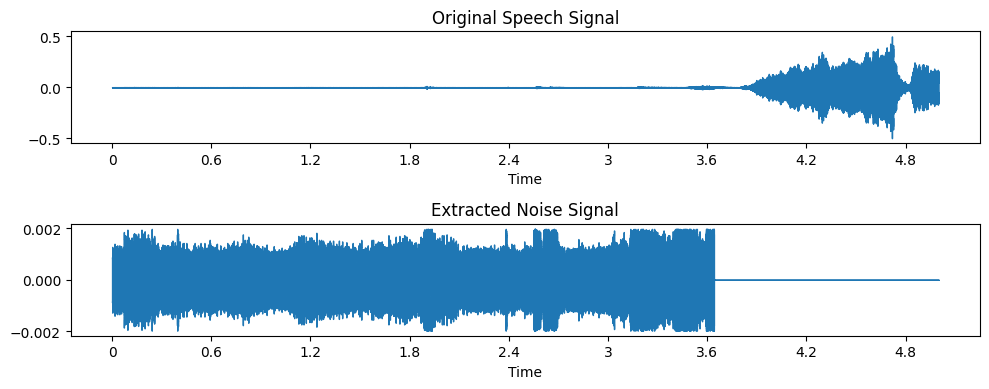

In [6]:
# 02) 노이즈 음성 부분을 찾기
#why? -> 원본에 삐 소리가 있어서 제거하고 싶음
#노이즈만 추출한 결과, 삐 소리를 대부분 추출(그러나 아기 울음소리도 조금 섞임)
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

def extract_noise(signal, threshold_amplitude):
    # 원본 음성 신호의 진폭 값을 계산
    amplitude = np.abs(signal)

    # 노이즈 음성 부분을 탐지하여 추출
    noise_mask = amplitude < threshold_amplitude
    noise_signal = signal[noise_mask]

    return noise_signal

# 원본 음성 신호 로드
speech_file = "/content/drive/MyDrive/baby/baby-data-main/sample/sad/03-02-04-01-87-150-03-01-00-14-04.wav"
x, fs = librosa.load(speech_file, sr=16000)

# 노이즈 음성 추출을 위한 진폭 기준값 설정
threshold_amplitude = 0.002

# 노이즈 음성 부분 추출
noise_signal = extract_noise(x, threshold_amplitude)

# 노이즈 음성 부분의 길이를 원본 음성의 길이에 맞춤
#(노이즈 음성 뒷부분 0으로 패딩해서 소리 안 남)
if len(noise_signal) > len(x):
    noise_signal = noise_signal[:len(x)]
else:
    padding = np.zeros(len(x) - len(noise_signal))
    noise_signal = np.concatenate((noise_signal, padding))

# 파형 그래프 그리기
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
librosa.display.waveshow(x, sr=fs)
plt.title("Original Speech Signal")
display(Audio(x, rate=fs))

plt.subplot(2, 1, 2)
librosa.display.waveshow(noise_signal, sr=fs)
plt.title("Extracted Noise Signal")
plt.tight_layout()
plt.show()
display(Audio(noise_signal, rate=fs))

In [7]:
# 03) 노이즈 음성 부분을 WAV 파일로 저장
'''
올바른 음성 신호 x와 샘플링 레이트 fs를 얻으려면 해당 음성 파일을 로드해야 합니다.
일반적으로 음성 파일의 경로를 지정하여 읽어와야 합니다.
-> 이런 이유로 노이즈 음성 파일 저장해줌...
'''

import soundfile as sf

output_noise_file = "/content/drive/MyDrive/baby/output_noise.wav"  # 저장할 노이즈 음성 파일의 이름과 경로 지정
sf.write(output_noise_file, noise_signal, fs)

print("Noise extracted and saved as", output_noise_file)

Noise extracted and saved as /content/drive/MyDrive/baby/output_noise.wav


In [12]:
# 04) edit following wav file name #음성 파일 받아옴
infile='/content/drive/MyDrive/baby/baby-data-main/sample/sad/03-02-04-01-87-150-03-01-00-14-04.wav' #노이즈 포함 wav 파일 #x
# outfile='/content/drive/MyDrive/baby/output_short.wav' #출력 wav 파일
noisefile='/content/drive/MyDrive/baby/output_noise.wav' #노이즈만 있는 파일 #noise_signal
nw, fs = librosa.load(noisefile, sr=16000)


In [13]:
# 05)

# 샘플링 레이트 설정
fs = 16000

# 원본 음성 파일과 노이즈 파일 로드
original_signal, _ = librosa.load(infile, sr=fs)
noise_signal, _ = librosa.load(noisefile, sr=fs)

# 원본 음성 스펙트럼 계산
original_spec = np.abs(librosa.stft(original_signal))

# 노이즈 스펙트럼 계산
noise_spec = np.abs(librosa.stft(noise_signal))

# 노이즈 스펙트럼을 원본 음성 스펙트럼에서 뺌
clean_spec = original_spec - noise_spec

# 역변환하여 깨끗한 음성 얻기
clean_signal = librosa.istft(clean_spec)

# 깨끗한 음성 저장
output_clean_file = "/content/drive/MyDrive/baby/output_clean.wav"
sf.write(output_clean_file, clean_signal, fs)

print("Clean audio saved as", output_clean_file)

Clean audio saved as /content/drive/MyDrive/baby/output_clean.wav


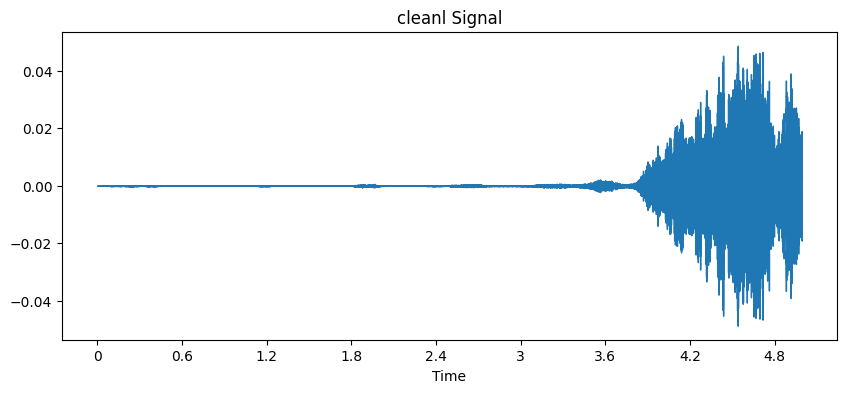

' 간간히 삐 소리 들림 + 뒷부분 썰림'

In [14]:
#06 제작된 음성 재생
plt.figure(figsize=(10, 4))
librosa.display.waveshow(clean_signal, sr=fs)
plt.title("cleanl Signal")
plt.show()
display(Audio(clean_signal, rate=fs))

''' 간간히 삐 소리 들림 + 뒷부분 썰림'''

##그래프 그리기

Noisy audio


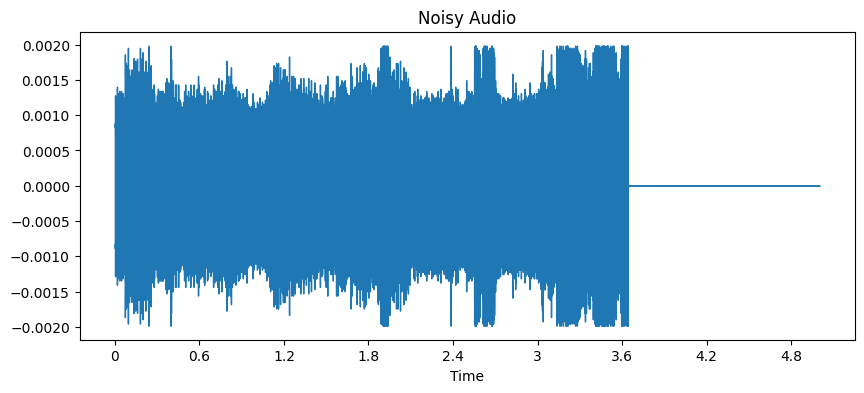

Clean + Noise audio


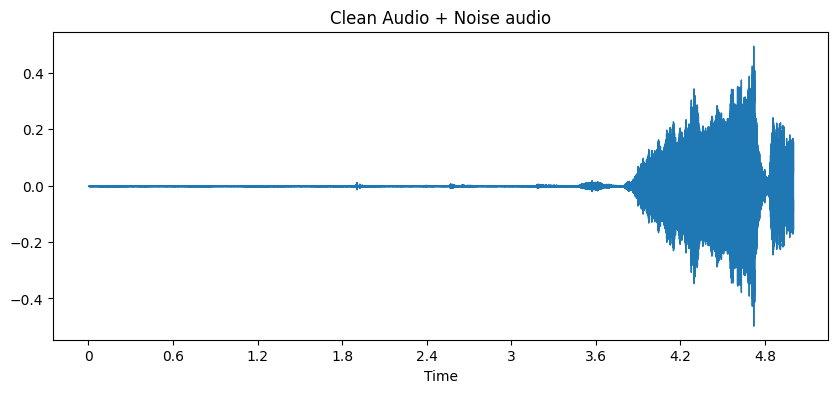

Clean audio


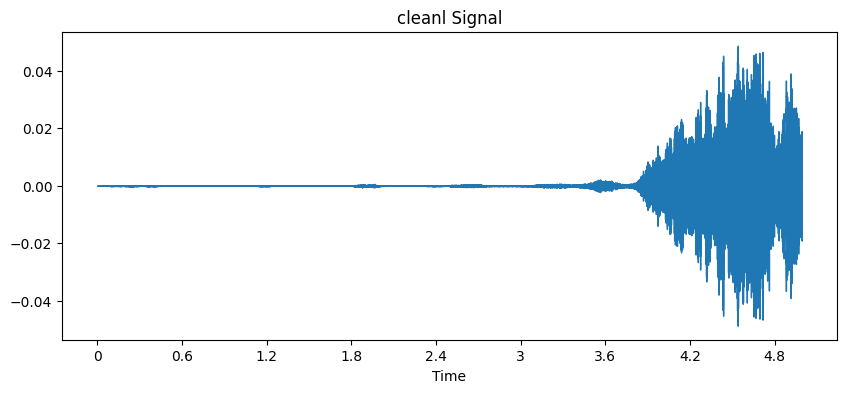

In [16]:
# Noisy audio #노이즈 음성 신호 오디오 형식으로 재생
print("Noisy audio")
plt.figure(figsize=(10, 4))
librosa.display.waveshow(nw, sr=fs)
plt.title("Noisy Audio")
plt.show()
display(Audio(nw, rate=fs))

# Clean audio + Noise #깨끗한 음성 신호 오디오 형식으로 재생
print("Clean + Noise audio")
plt.figure(figsize=(10, 4))
librosa.display.waveshow(x, sr=fs)
plt.title("Clean Audio + Noise audio")
plt.show()
display(Audio(x, rate=fs))

# Clean audio # 깨끗한 음성신호
print("Clean audio")
plt.figure(figsize=(10, 4))
librosa.display.waveshow(clean_signal, sr=fs)
plt.title("cleanl Signal")
plt.show()
display(Audio(clean_signal, rate=fs))